# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, shuffle = True, stratify=target, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,707,92,35,58,136,58,6,122,55,17,132,142,222,116,64,6,17,197,203
1,242,85,42,59,132,58,7,149,46,19,144,166,320,172,83,8,4,179,182
2,310,90,50,90,188,61,10,181,36,21,158,211,492,220,69,6,19,191,199
3,355,93,42,88,188,62,10,183,36,21,141,208,504,168,70,3,12,189,197
4,588,89,38,78,153,61,7,146,46,19,127,166,314,142,69,0,9,187,194
5,501,105,54,96,185,57,10,219,30,25,170,231,706,217,75,5,12,187,195
6,186,91,42,81,193,69,5,169,38,20,137,184,434,156,68,3,23,198,204
7,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
8,642,95,46,104,208,66,9,191,35,22,148,210,543,169,68,0,28,190,200
9,322,87,43,65,127,56,8,149,46,19,143,169,322,171,85,6,3,180,182


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,413.116576,93.438980,44.790528,81.950820,168.859745,61.790528,8.664845,168.520947,41.032787,20.557377,147.846995,188.349727,438.347905,174.222222,72.473588,6.247723,12.468124,188.903461,195.584699
std,240.033622,8.108886,6.179923,15.567587,33.484668,8.232802,5.161326,33.247222,7.847940,2.603844,14.575073,31.119292,176.757239,32.940415,7.492194,4.763438,9.041338,6.170906,7.396156
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,210.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,316.000000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,414.000000,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,173.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,617.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,115.000000,59.000000,112.000000,322.000000,133.000000,55.000000,262.000000,61.000000,28.000000,186.000000,285.000000,998.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
scaler = StandardScaler()

scaler.fit_transform(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_pd = pd.DataFrame(X_train_scaled)
print(X_train_scaled_pd)

           0         1         2   ...        16        17        18
0    1.225459 -0.177619 -1.585693  ...  0.501697  1.313247  1.003503
1   -0.713536 -1.041657 -0.451959  ... -0.937455 -1.606327 -1.838399
2   -0.429984 -0.424487  0.843736  ...  0.723105  0.340056  0.462188
3   -0.242339 -0.054185 -0.451959  ... -0.051823  0.015659  0.191531
4    0.729243 -0.547921 -1.099807  ... -0.383935 -0.308739 -0.214455
..        ...       ...       ...  ...       ...       ...       ...
544  0.287236  0.069249  0.195888  ...  0.280289  0.340056  0.326859
545  1.421444 -0.301053 -0.613921  ... -0.051823  0.826651  0.732845
546  0.879359 -1.165091 -1.423731  ...  2.605072  0.015659 -0.079127
547  0.403992 -0.918223 -0.289997  ... -0.383935 -1.606327 -1.838399
548  1.012795 -1.165091 -0.451959  ...  0.833809 -0.308739 -0.349784

[549 rows x 19 columns]


Стандартизируем данные с помощью StandartScaler, с помощью LabelEncoder отобразим метки классов в числовое множество. Данные необходимо стандартизировать, чтобы они были одного масштаба для лучшей сходимости градиентных методов, а также для того, чтобы полученные веса были более информативными (чем больше вес у какого-то признака, тем больше его значимость).

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, class_weight='balanced')

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 50, 100, 150, 200]}
cv = 3

grid_cv_clf = GridSearchCV(clf, param_grid, cv = cv)
grid_cv_clf.fit(X_train_scaled, y_train)

grid_cv_clf.best_estimator_

LogisticRegression(C=50, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='saga', tol=0.001,
                   verbose=0, warm_start=False)

In [ ]:
y_pred = grid_cv_clf.predict(X_test_scaled)

print('Accuracy on test: {0}'.format(accuracy_score(y_test, y_pred)))
print('F1_score on test: {0}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy on test: 0.8249158249158249
F1_score on test: 0.823301373269136


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

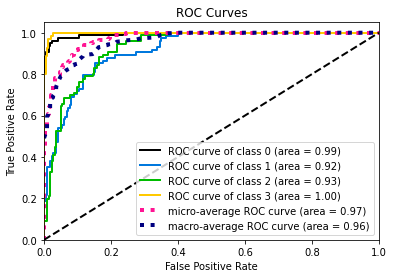

In [ ]:
probas = grid_cv_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, probas)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt

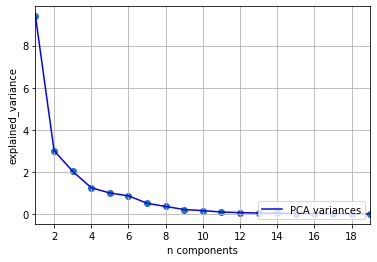

In [ ]:
clf = PCA()

clf.fit(X_train_scaled)
vars = clf.explained_variance_

def plot_scores(d_scores):
    n_components = np.arange(1,len(d_scores)+1)
    plt.plot(n_components, d_scores, 'b', label='PCA variances')
    plt.scatter(n_components, d_scores)
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('explained_variance')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_scores(vars) 


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
pca_clf = PCA(n_components = 10)

pca_clf.fit(X_train_scaled)

PCA_X_train = pca_clf.transform(X_train_scaled)
PCA_X_test = pca_clf.transform(X_train_scaled)

print('New shape of train data on principal components: {0}'.format(PCA_X_train.shape))
print('New shape of test data on principal components: {0}'.format(PCA_X_test.shape))

New shape of train data on principal components: (549, 10)
New shape of test data on principal components: (549, 10)


Было выбрано 10 главных компонент, так как при данном значении теряется значительно меньше информации, чем при меньшем числе компонент. Если выберем больше главных компонент, то, как видно из графика, дисперсия практически не уменьшается.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
scaler = StandardScaler()
regressor = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
pipeline = Pipeline(steps = [('scaler', scaler), ('reduce_dim', PCA(n_components = 10)), ('clf', regressor)])

In [ ]:
cv = 3
param_grid = dict(clf__C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20, 50, 100, 150, 200])

grid_cv_pca = GridSearchCV(pipeline, param_grid, cv = cv)
grid_cv_pca.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=10, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                      

In [ ]:
grid_cv_pca.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=20, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='saga', tol=0.001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_pred = grid_cv_pca.predict(X_test)

print('Accuracy on test: {0}'.format(accuracy_score(y_test, y_pred)))
print('F1_score on test: {0}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy on test: 0.7070707070707071
F1_score on test: 0.7022942028303572


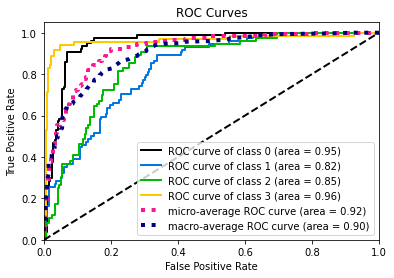

In [ ]:
probas = grid_cv_pca.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
clf = DecisionTreeClassifier()
pipeline = Pipeline(steps = [('scaler', scaler), ('reduce_dim', PCA()), ('clf', clf)])

In [ ]:
cv = 3
param_grid_tree = dict(clf__max_depth = [2, 4, 6, 8, 10, 15, 20, 25], clf__min_samples_split = [2, 10, 20], reduce_dim__n_components = [6, 8, 10, 12])

grid_cv_tree = GridSearchCV(pipeline, param_grid_tree, cv = cv)
grid_cv_tree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('reduce_dim',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               

In [ ]:
grid_cv_tree.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=8,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
              

In [ ]:
y_pred = grid_cv_tree.predict(X_test)

print('Accuracy on test: {0}'.format(accuracy_score(y_test, y_pred)))
print('F1_score on test: {0}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy on test: 0.6363636363636364
F1_score on test: 0.6248930867112685


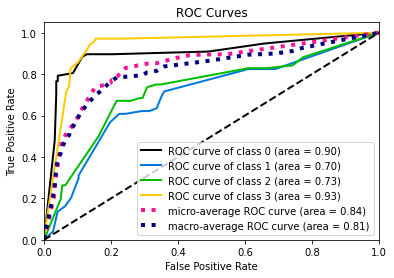

In [ ]:
probas = grid_cv_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probas)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
import random as rand

In [ ]:
def bootstrap(X, y, bootstrap_size):
  new_X = []
  new_y = []
  for i in range(bootstrap_size):
    idx = rand.randint(0,len(X)-1)
    new_X.append(X[idx])
    new_y.append(y[idx])

  return (np.asarray(new_X), np.asarray(new_y))

In [ ]:
# YOUR CODE HERE
n_min = 2
n_max = 100

n_ensembles = np.arange(n_min, n_max + 1, 5)

X_train_ensemble = []
y_train_ensemble = []

for i in range(n_max):
  (X_boost, y_boost) = bootstrap(X_train, y_train, len(X_train))
  X_train_ensemble.append(X_boost)
  y_train_ensemble.append(y_boost)


X_train_ensemble = np.asarray(X_train_ensemble)
y_train_ensemble = np.asarray(y_train_ensemble)

print(X_train_ensemble.shape)
print(y_train_ensemble.shape)

(100, 549, 19)
(100, 549)


In [ ]:
pred_trees = []
pred_logreg = []

for (x_tree, y_train_tree) in zip(X_train_ensemble, y_train_ensemble):
  scaler = StandardScaler()
  
  pipeline_tree = Pipeline(steps = [('scaler', scaler), ('clf', DecisionTreeClassifier())])
  pipeline_logreg = Pipeline(steps = [('scaler', scaler), ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))])

  cv = 3
  pg_ens_tree = dict(clf__max_depth = [2, 4, 6, 8, 10, 15, 20, 25], clf__min_samples_split = [2, 3, 10, 20])
  pg_ens_logreg = dict(clf__C = [0.01, 0.1, 1, 10, 100])

  gc_ens_logreg = GridSearchCV(pipeline_logreg, pg_ens_logreg, cv = cv)
  gc_ens_logreg.fit(x_tree, y_train_tree)

  gc_ens_tree = GridSearchCV(pipeline_tree, pg_ens_tree, cv = cv)
  gc_ens_tree.fit(x_tree, y_train_tree)

  y_pred_logreg = gc_ens_logreg.best_estimator_.predict(X_test)
  pred_logreg.append(y_pred_logreg)

  y_pred_tree = gc_ens_tree.best_estimator_.predict(X_test)
  pred_trees.append(y_pred_tree)

pred_trees = np.asarray(pred_trees)
pred_logreg = np.asarray(pred_logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [ ]:
def scores(preds, y_test, n_ensembles):
  accuracy = []
  f1 = []

  for N in n_ensembles:
    perm = np.random.permutation(n_max)[ : N]
    y_preds_N = [np.argmax(np.bincount(preds[perm, i])) for i in range(preds.shape[1])]
    accuracy_N = accuracy_score(y_test, y_preds_N)
    f1_score_N = f1_score(y_test, y_preds_N, average='weighted')
    accuracy.append(accuracy_N)
    f1.append(f1_score_N)

  return (accuracy, f1)


In [ ]:
(accuracy_score_tree_ens, f1_score_tree_ens) = scores(pred_trees, y_test, n_ensembles)
(accuracy_score_logreg_ens, f1_score_logreg_ens) = scores(pred_logreg, y_test, n_ensembles)

print(accuracy_score_tree_ens, f1_score_tree_ens)
print(accuracy_score_logreg_ens, f1_score_logreg_ens)

[0.6666666666666666, 0.7171717171717171, 0.7171717171717171, 0.7508417508417509, 0.7373737373737373, 0.7542087542087542, 0.7575757575757576, 0.734006734006734, 0.7441077441077442, 0.7508417508417509, 0.7542087542087542, 0.7575757575757576, 0.7441077441077442, 0.7575757575757576, 0.7542087542087542, 0.7542087542087542, 0.7474747474747475, 0.734006734006734, 0.7508417508417509, 0.7542087542087542] [0.6664833586426597, 0.7120406026251047, 0.7098118172068376, 0.7501646026643225, 0.7305206080733956, 0.7477170367706908, 0.7514386125786116, 0.7259400033093154, 0.7322728463533061, 0.7433686433459109, 0.7465715826274467, 0.7475226510297533, 0.7356534676362511, 0.7487503838749618, 0.7420976788091996, 0.7444969058777382, 0.7353450871218393, 0.7234961832200717, 0.7380178837949952, 0.7426535131749328]
[0.797979797979798, 0.8080808080808081, 0.8114478114478114, 0.8080808080808081, 0.8215488215488216, 0.8080808080808081, 0.8181818181818182, 0.8047138047138047, 0.8080808080808081, 0.8114478114478114, 

In [ ]:
def plot_scores_accuracy(d_scores):
    plt.plot(n_ensembles, d_scores, 'b', label='ensembles accuracy')
    plt.scatter(n_ensembles, d_scores)
    plt.xlim(n_ensembles[0], n_ensembles[-1])
    plt.xlabel('n_ensembles')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy score for ensembles')
    plt.grid(True)
    plt.show()

def plot_scores_f1(d_scores):
    plt.plot(n_ensembles, d_scores, 'b', label='ensembles accuracy')
    plt.scatter(n_ensembles, d_scores)
    plt.xlim(n_ensembles[0], n_ensembles[-1])
    plt.xlabel('n_ensembles')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.title('F1 score for ensembles')
    plt.grid(True)
    plt.show()

Результаты для Решающих Деревьев


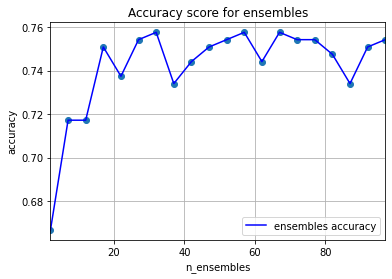

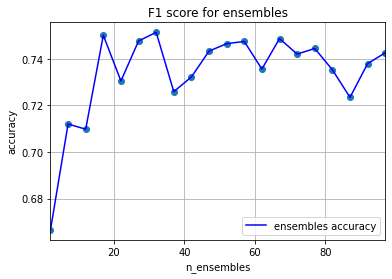

In [ ]:
plot_scores_accuracy(accuracy_score_tree_ens) 
plot_scores_f1(f1_score_tree_ens) 

Результаты для Логистических Регрессий

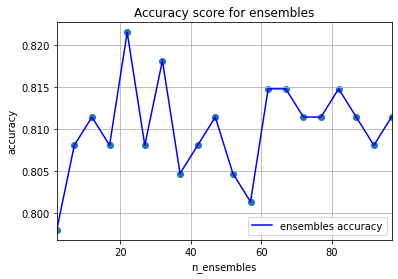

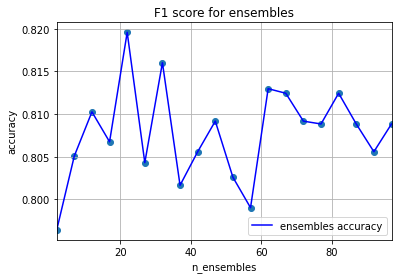

In [ ]:
plot_scores_accuracy(accuracy_score_logreg_ens) 
plot_scores_f1(f1_score_logreg_ens) 

На основании полученных графиков можем сделать вывод, что ансамбли логистических регрессий не дают большого выйгрыша в качестве, а значит логистическую регрессию, как и линейную, нецелесообразно использовать в бэггинге. Для решающих деревьев получаем обратный результат: для ансамбля из 17 решающих деревьев точность больше на 10 процентов. Это связано с тем, что деревья склонны к переобучению, а значит лучше использовать несколько решающих деревьев. Поэтому оптимальное количество деревьев 17.

Гиперпараметры, полученные для одного дерева, сильно зависят от выборки, на которой учится дерево, поэтому необходимо для каждого дерева подбирать гиперпараметры отдельно.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
accuracy_score_forest = []
f1_score_forest = []

for n_estimators in n_ensembles:
  scaler = StandardScaler()
  pipeline_forest = Pipeline(steps = [('scaler', scaler), ('clf', RandomForestClassifier(n_estimators = n_estimators))])

  pipeline_forest.fit(X_train, y_train)

  y_pred_forest = pipeline_forest.predict(X_test)
  accuracy_score_forest.append(accuracy_score(y_test, y_pred_forest))
  f1_score_forest.append(f1_score(y_test, y_pred_forest, average='weighted'))

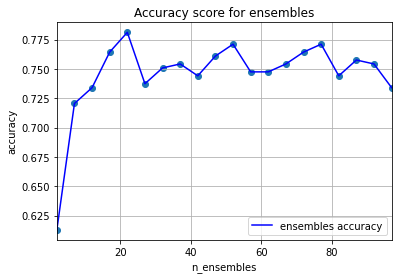

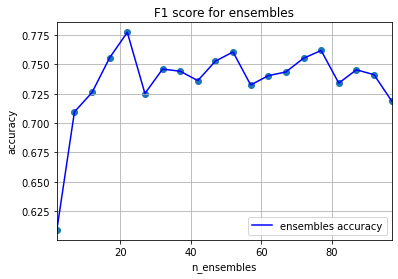

In [ ]:
plot_scores_accuracy(accuracy_score_forest) 
plot_scores_f1(f1_score_forest) 

Оптимальное количество деревьев для рандомного леса, после которого получаем примерно одинаковую точность - 22. Результат отличается от полученного в бэггинге, так как деревья отличаются еще и по признакам, а значит являются более независимыми друг от друга.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
#так как тренировочная выборка является сбалансированной, то баланс классов учитывать не надо, поэтому просто разделим выборку на 10 равных частей

forest_score = ([],[])
logreg_score = ([],[])
tree_score = ([],[])
idx_parts = [int(X_train.shape[0]*i/10) for i in range(1, 11)]


for part in idx_parts:
  scaler = StandardScaler()

  pipeline_forest = Pipeline(steps = [('scaler', scaler), ('clf', RandomForestClassifier(n_estimators = n_estimators))])
  pipeline_tree = Pipeline(steps = [('scaler', scaler), ('clf', DecisionTreeClassifier())])
  pipeline_logreg = Pipeline(steps = [('scaler', scaler), ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])

  pg_tree = dict(clf__max_depth = [10, 15, 20], clf__min_samples_split = [2, 3, 5])
  pg_logreg = dict(clf__C = [0.01, 0.1, 1, 5, 10, 100, 200])
  pg_forest = dict(clf__n_estimators = [10, 20, 40, 50] , clf__max_depth = [2, 10, 20], clf__min_samples_split = [2, 5])

  cv = 3

  gc_forest = GridSearchCV(pipeline_forest, pg_forest, cv = cv)
  gc_forest.fit(X_train[: part - 1], y_train[: part - 1])

  y_pred_forest = gc_forest.best_estimator_.predict(X_test)

  forest_score[0].append(accuracy_score(y_test, y_pred_forest))
  forest_score[1].append(f1_score(y_test, y_pred_forest, average='weighted'))

  gc_logreg = GridSearchCV(pipeline_logreg, pg_logreg, cv = cv)
  gc_logreg.fit(X_train[: part - 1], y_train[: part - 1])

  y_pred_logreg = gc_logreg.best_estimator_.predict(X_test)

  logreg_score[0].append(accuracy_score(y_test, y_pred_logreg))
  logreg_score[1].append(f1_score(y_test, y_pred_logreg, average='weighted'))

  gc_tree = GridSearchCV(pipeline_tree, pg_tree, cv = cv)
  gc_tree.fit(X_train[: part - 1], y_train[: part - 1])

  y_pred_tree = gc_tree.best_estimator_.predict(X_test)

  tree_score[0].append(accuracy_score(y_test, y_pred_tree))
  tree_score[1].append(f1_score(y_test, y_pred_tree, average='weighted'))




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [ ]:
def plot_final_scores_f1(d_scores):
    plt.plot(range(1, 11), d_scores, 'b', label='data parts f1')
    plt.scatter(range(1, 11), d_scores)
    plt.xlim(1, 10)
    plt.xlabel('fraction of train data')
    plt.ylabel('f1_score')
    plt.legend(loc='lower right')
    plt.title('F1 score for ensembles')
    plt.grid(True)
    plt.show()

def plot_final_scores_accuracy(d_scores):
    plt.plot(range(1, 11), d_scores, 'b', label='data parts accuracy')
    plt.scatter(range(1, 11), d_scores)
    plt.xlim(1, 10)
    plt.xlabel('fraction of train data')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy score for ensembles')
    plt.grid(True)
    plt.show()

Результаты для леса

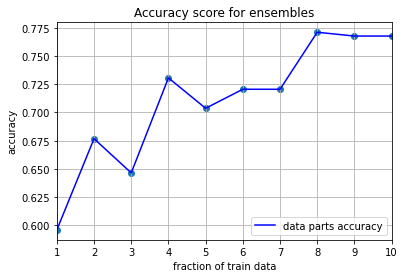

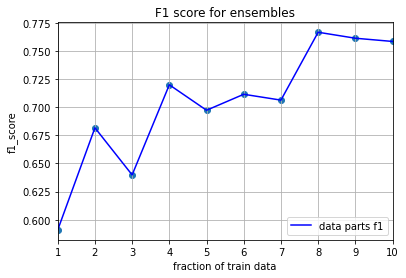

In [ ]:
plot_final_scores_accuracy(forest_score[0]) 
plot_final_scores_f1(forest_score[1]) 

Результаты для дерева

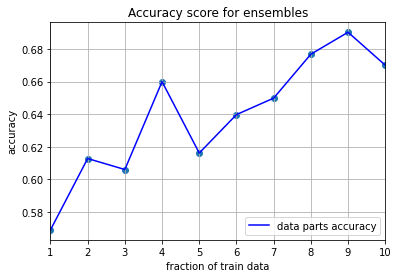

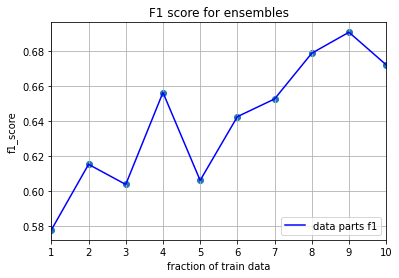

In [ ]:
plot_final_scores_accuracy(tree_score[0]) 
plot_final_scores_f1(tree_score[1]) 

Результаты для регрессии

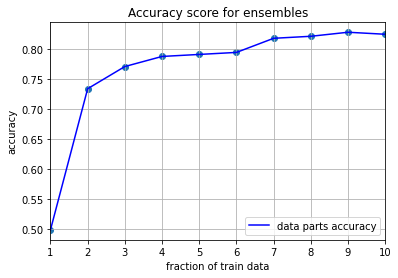

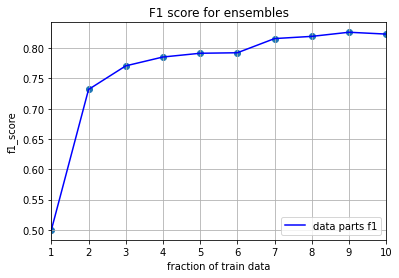

In [ ]:
plot_final_scores_accuracy(logreg_score[0]) 
plot_final_scores_f1(logreg_score[1]) 

Из полученных графиков можем сделать вывод, что Решающие деревья и Случайный лес гораздо сильнее зависят от объема данных, чем Логистическая регрессия. По сравнению с Решающим деревом Случайный лес более устойчив к изменению объема выборки. Это следует из того, что дерево сильно подстраивается по выборку и склонно к переобучению. Случайный лес же более сильный алгоритм, который представляет собой композицию большого числа деревьев и меньше переобучается.